<img align="right" width="240" height="240" src="img/HS_Mu__nchen_Logo.png"/>

<style>
p.small {
  line-height: 1;
}
</style>
<body>
    
<p class="small"> <b>Geoinformatics | Course Remote Sensing (1)</b><br> <small>Schmitt | Ulloa</small><br> <small>Summer Semester 2020</small><br></p>

<h1>Practice 4: Unsupervised classification</h1>

<h2>Overview</h2>

<p class="main"><b>Objectives:</b> Perform an unsupervised classification of your AOI, on a multiband image data using Python you need GDAL, Numpy and Sklearn.</p>

<p><b>Data:</b> For this practice, use the following files: </p>

<p class="data"></p>
<ul>
    <li> Raster file: GeoTIFF (S2A_L2A_T32UPU_rstck_id1.tif, S2A_L2A_T32UPU_rstck_id2.tif, S2A_L2A_T32UPU_rstck_id3.tif)</li> 
</ul>

<p><b>Tasks:</b> load your rasterfile in Python and perform an unsupervised classification. Export the classification file and visualize it.</p> 


<h2>Procedure</h2>

<p>To do our unsupervised classification we are going to use the Scikit-Learn library.
It is a very commonly used python library for machine learning which includes all the classification algorithms presented in the lecture. For further information see <a href= "https://en.wikipedia.org/wiki/Scikit-learn
https://scikit-learn.org/stable/ ">this site.</a></p>

<h4>Load and visualize raster</h4>

In [1]:
from sklearn import cluster

If you wish to see the data you will also need Matplotlib

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from matplotlib.patches import Patch
from matplotlib.colors import ListedColormap
import matplotlib.colors as colors

These are the libraries we are going to use to read and write our imagery and prediction rasters

In [4]:
#from osgeo import gdal, gdal_array
import os
import rasterio as rio
import numpy as np
from rasterio.plot import show
from rasterio.plot import plotting_extent

<p>1. Read your rasterstack using the function <code>open</code> from the package rio(rasterio). Assign your raster to an object called "s2_stack". Remeber to specify first the path where your data is located. Store your path in an object called "folder_src".</p>

In [5]:
# SOLUTION
# Read in raster image. Remember to write an "r" before your path if you use "\". This can only be used with the "os" package 
folder_src=r"C:\Users\ulloa-to\PythonProjects\practices_fe1_ss2020\scripts\data\p4\s2_Nodata_rasterstack"
s2_stack = rio.open(os.path.join(folder_src,'S2A_L2A_T32UPU_rstck_id1.tif')) 

<p>To check that you loaded your raster, you can print some of the properties of that raster. I'll check here the number of bands.</p>

In [6]:
# number of bands
s2_stack.count

4

<p>2. Apply the necessary functions (see Practice 1) to extract the name, dimensions and resolution of your raster.</p>

In [7]:
# SOLUTION
# name
print(s2_stack.name)

#Bounding Box
b = s2_stack.bounds
#width
w = s2_stack.width
#height
h = s2_stack.height
#Resolution
horizontal_res = (b[2] - b[0]) / w

print("The boundaries of the raster are:", b, "\nWidth:", w, "\nHeight:", h, "\nResolution:", horizontal_res)

C:\Users\ulloa-to\PythonProjects\practices_fe1_ss2020\scripts\data\p4\s2_Nodata_rasterstack\S2A_L2A_T32UPU_rstck_id1.tif
The boundaries of the raster are: BoundingBox(left=685550.0, bottom=5321980.0, right=686490.0, top=5322740.0) 
Width: 94 
Height: 76 
Resolution: 10.0


<h4>Plot a single band: NIR</h4>
<p>Let's make a visualization of one band from your RasterStack, in this case the NIR band</p>

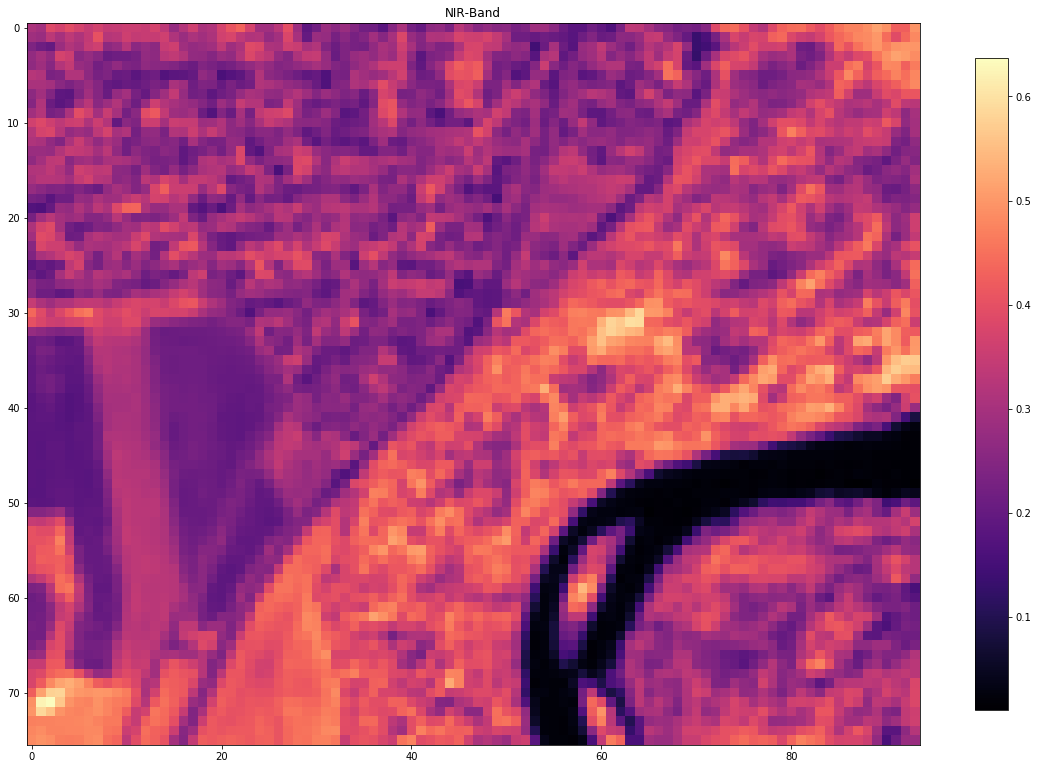

In [8]:
#Plot Band NIR
fig,ax = plt.subplots(figsize=(20,20))
nirNpArray = s2_stack.read(4)
ax.set_title("NIR-Band")
# Be careful Numpy Array indexes start at zero!
#This command equals the one we used before to visualize band 4 using the show() function from rasterio
plot=ax.imshow(nirNpArray, cmap='magma')
plt.colorbar(plot,shrink=0.6)
plt.show()

<p>3. Change the settings of the previous function with the following values:
    <ul>
        <li>figsize=(5,5)</li>
        <li>plt.colorbar(plot,shrink=1)</li></p>

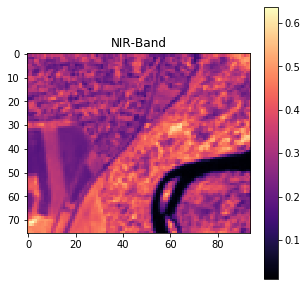

In [30]:
## SOLUTION
#Plot Band NIR
fig,ax = plt.subplots(figsize=(5,5))
nirNpArray = s2_stack.read(4)
ax.set_title("NIR-Band")
# Be careful Numpy Array indexes start at zero!
#This command equals the one we used before to visualize band 4 using the show() function from rasterio
plot=ax.imshow(nirNpArray, cmap='magma')
plt.colorbar(plot,shrink=1)
plt.show()

<p>4. Explain the purpose of the parameters <code>figsize</code> and <code>shrink</code></p>

figsize: size of the plot   
shrink: reduction (size) of the scale graph in relation to the whole plot

<p>5. <code>cmap</code> is a parameter that defines some defined color scales for maps in the matplotlib package. Using the information on the next image, choose another color scale and change the color of your map.</p>

<img src="img/img_p4_cmap_colormap.png" width="700"/>

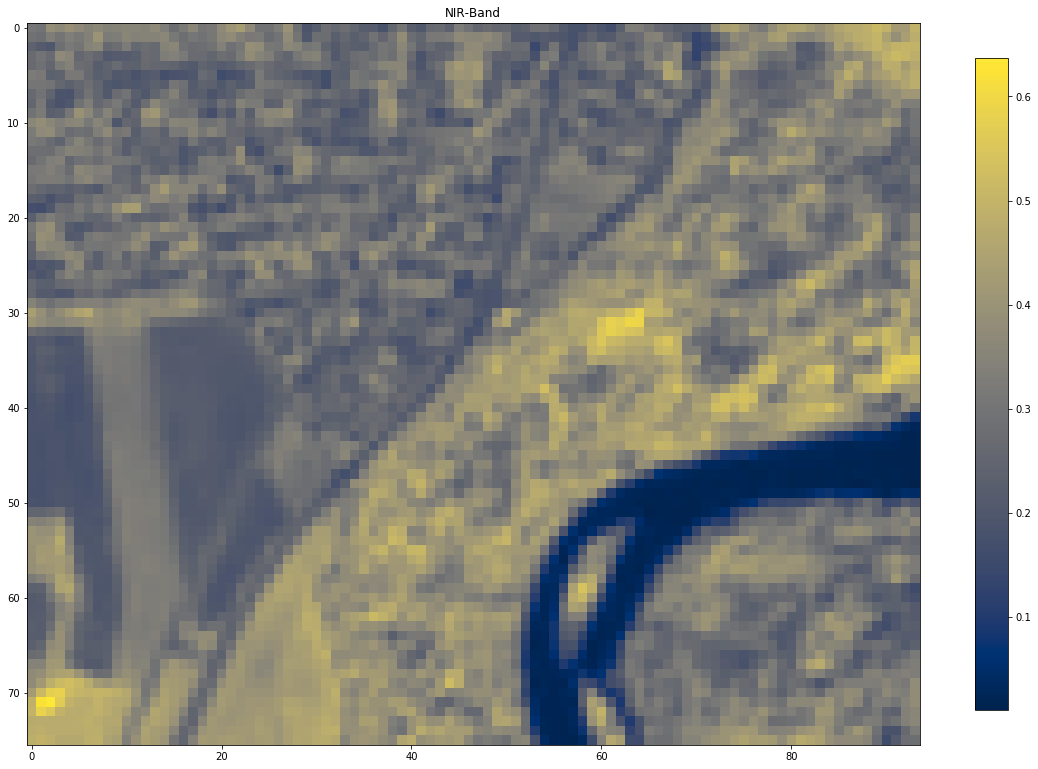

In [10]:
## SOLUTION
#Plot Band NIR
fig,ax = plt.subplots(figsize=(20,20))
nirNpArray = s2_stack.read(4)
ax.set_title("NIR-Band")
# Be careful Numpy Array indexes start at zero!
#This command equals the one we used before to visualize band 4 using the show() function from rasterio
plot=ax.imshow(nirNpArray, cmap='cividis')
plt.colorbar(plot,shrink=0.6)
plt.show()

<p>6. Using the previous line code, plot the bands BLUE and GREEN. Remember to update the title with the command <code>ax.set_title("your title")</code> </p>

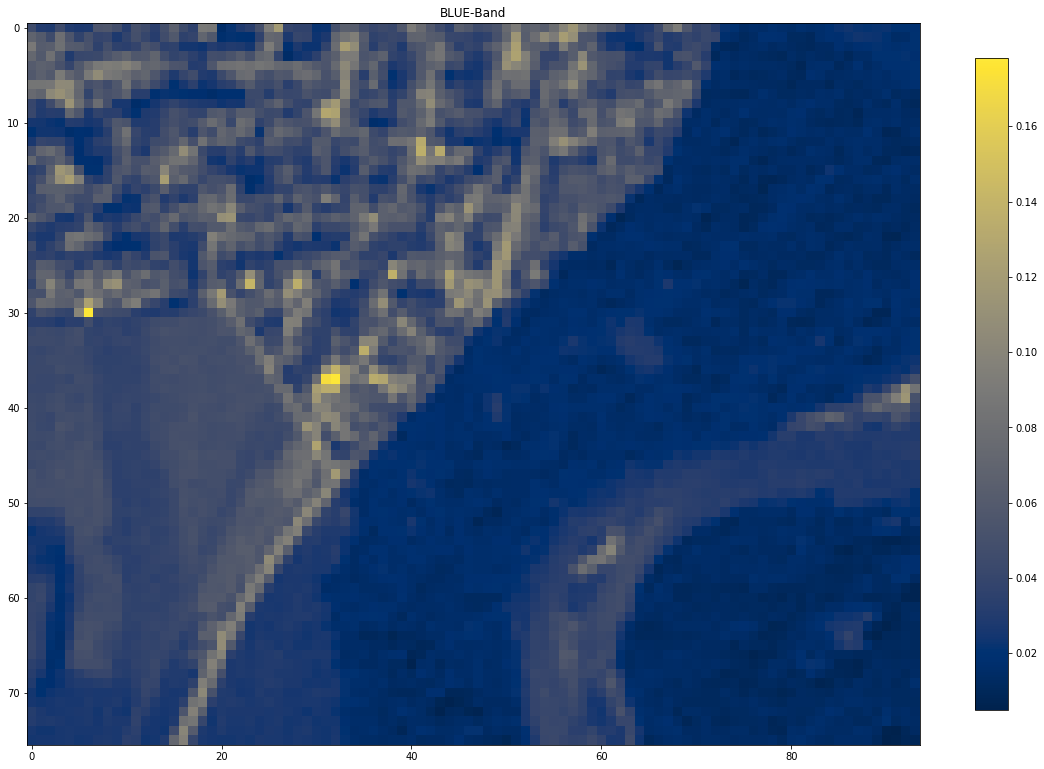

In [11]:
## SOLUTION
#Plot Band BLUE (first band)
fig,ax = plt.subplots(figsize=(20,20))
nirNpArray = s2_stack.read(1) # since it is the first band, here goes value=1
ax.set_title("BLUE-Band")
# Be careful Numpy Array indexes start at zero!
#This command equals the one we used before to visualize band 4 using the show() function from rasterio
plot=ax.imshow(nirNpArray, cmap='cividis')
plt.colorbar(plot,shrink=0.6)
plt.show()

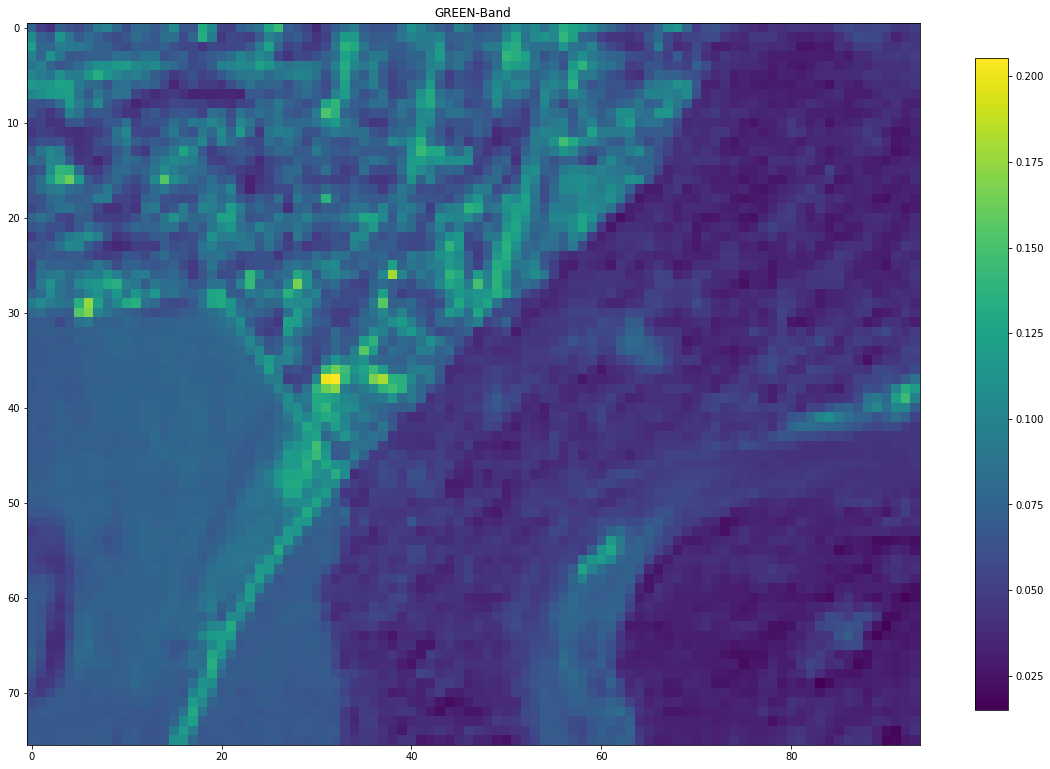

In [12]:
## SOLUTION
#Plot Band GREEN
fig,ax = plt.subplots(figsize=(20,20))
nirNpArray = s2_stack.read(2) # since it is the second band, here goes value=2
ax.set_title("GREEN-Band")
# Be careful Numpy Array indexes start at zero!
#This command equals the one we used before to visualize band 4 using the show() function from rasterio
plot=ax.imshow(nirNpArray, cmap='viridis')
plt.colorbar(plot,shrink=0.6)
plt.show()

<p>7. Now we want to take a look at the structure of the RasterStack with a function you will use afterwards. Use the function <code>shape</code> to extract the information of the number of columns and rows of your rasterstack (hint: name_of_your_raster.shape)</p>

In [13]:
## SOLUTION
s2_stack.shape

(76, 94)

<p>8. Please explain the meaning of the values from the result of the function <code>shape</code>. Which other functions so far in this practice have returned the same values?</p>

The function 'shape' returns the dimensions of the raster:  
    number of columns: 94  
        number of rows: 76

<p>Now we will use the previous function and store the NIR band in an object called "band". This object will be turned into a vector for the classification purposes in the next step</p>

In [33]:
# Create an object called "band" that stores the 4th value of your rasterstack = NIR band
band = s2_stack.read(4)
band.shape

(76, 94)

<h4>Perform unsupervised classification with k-means algorithm on NIR band</h4>

In [34]:
#Make linear vector for Sci-Kit Learn
X = band.reshape((-1,1))
print ('linear Vector:',X.shape)

# Lets use our classification Algorithm with 8 clusters.
# The kmeans classification of the NIR band will be stored in the object "kmeans_nir"
k_means = cluster.KMeans(n_clusters=8)
k_means.fit(X)
# Lets write and reshape our results into the original image dimensions
X_NIR = k_means.labels_
X_NIR = X_NIR.reshape(band.shape)
print ('reshaped vector:',X_NIR.shape)

linear Vector: (7144, 1)
reshaped vector: (76, 94)


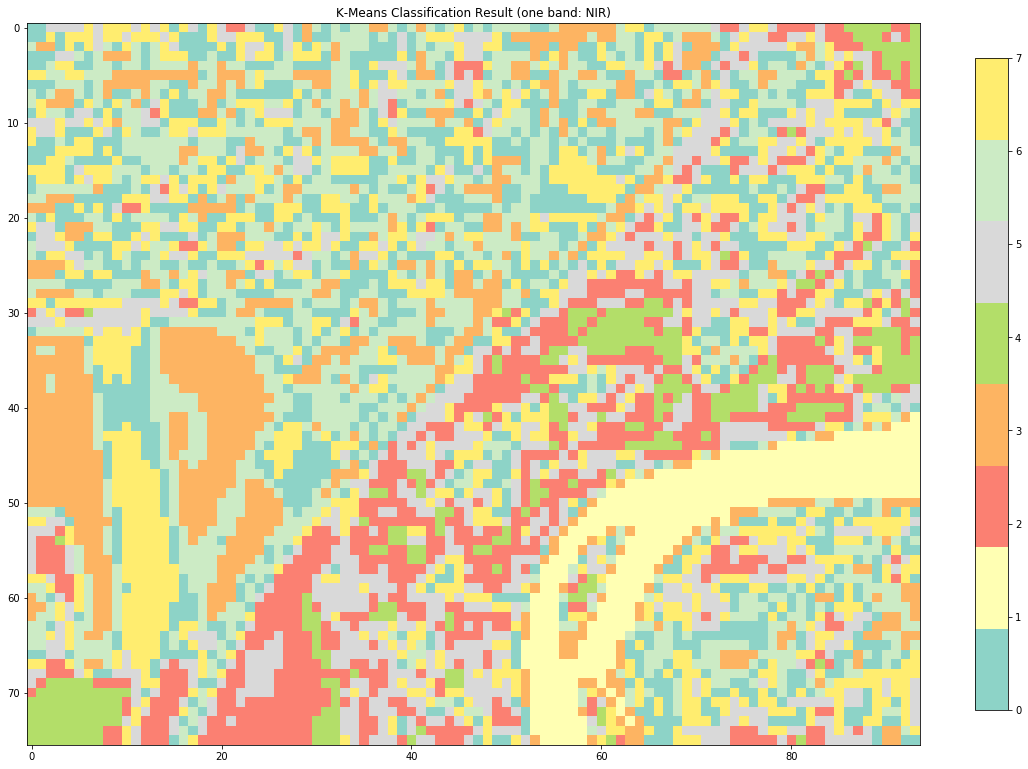

In [35]:
#Lets plot the Results
fig,ax = plt.subplots(figsize=(20,20))
ax.set_title("K-Means Classification Result (one band: NIR)")
plot=ax.imshow(X_NIR, cmap=plt.cm.get_cmap('Set3', 8))
#plot.clim(-0.5, 2.5)
plt.colorbar(plot, ticks=[0, 1, 2, 3, 4, 5, 6, 7],shrink=0.6)

plt.show()

<p>9. Run again the unsupervised classification. This time use 5 clusters instead of 8. Plot your results   
    (hint: modify and adapt  
    <code>k_means = cluster.KMeans(n_clusters=8);    
    plot=ax.imshow(X_NIR, cmap=plt.cm.get_cmap('Set3', 8));   
    plt.colorbar(plot, ticks=[0, 1, 2, 3, 4, 5, 6, 7],shrink=0.6)</code>)</p>

In [17]:
## SOLUTION
#Make linear vector for Sci-Kit Learn
X = band.reshape((-1,1))
print ('linear Vector:',X.shape)

# Lets use our classification Algorithm with 5 clusters.
# The kmeans classification of the NIR band will be stored in the object "kmeans_nir"
k_means = cluster.KMeans(n_clusters=5)
k_means.fit(X)
# Lets write and reshape our results into the original image dimensions
X_NIR = k_means.labels_
X_NIR = X_NIR.reshape(band.shape)
print ('reshaped vector:',X_NIR.shape)

linear Vector: (7144, 1)
reshaped vector: (76, 94)


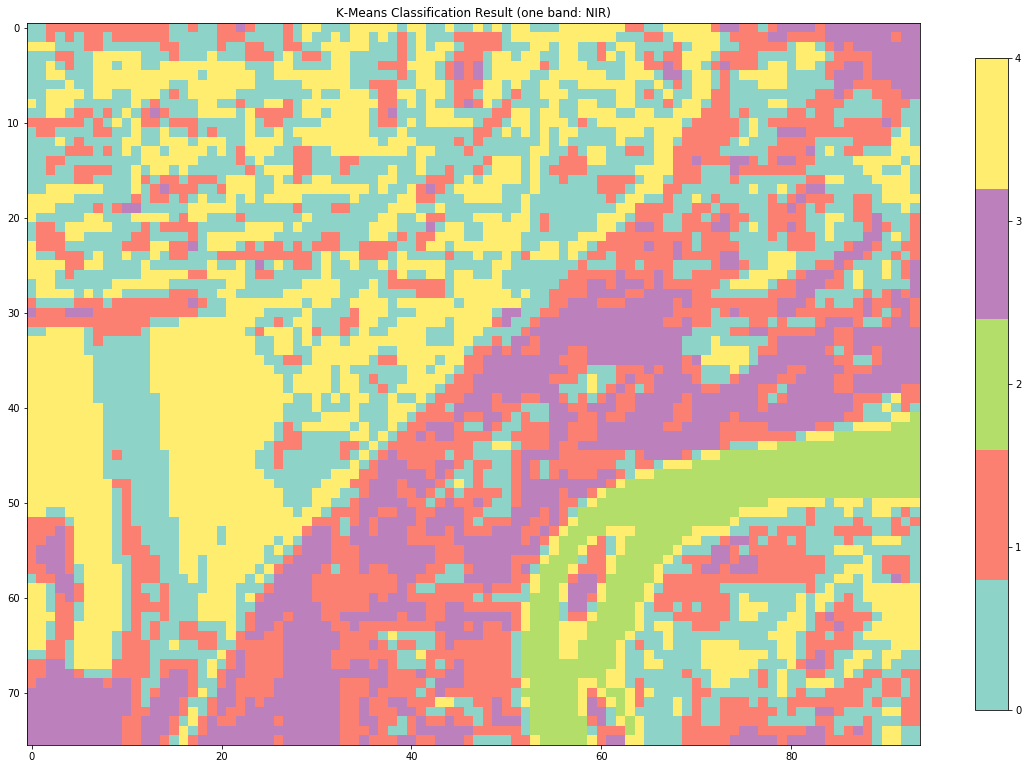

In [18]:
## SOLUTION
#Lets plot the Results
fig,ax = plt.subplots(figsize=(20,20))
ax.set_title("K-Means Classification Result (one band: NIR)")
plot=ax.imshow(X_NIR, cmap=plt.cm.get_cmap('Set3', 5))
#plot.clim(-0.5, 2.5)
plt.colorbar(plot, ticks=[0, 1, 2, 3, 4],shrink=0.6)
plt.show()

<p>10. Which differences can you see among the unsupervised classification with 8 clusters vs 5 clusters? What does the clusters mean?</p>

With 8 clusters, the classification has more salt-and-pepper effect. With 5 clusters, the classficiation looks more homogeneous. Clusters mean classes. In this case, landclasses.

<p>11. Repeat the previous procedure with 2 clusters. How accurate is the classification?</p>

In [19]:
## SOLUTION
#Make linear vector for Sci-Kit Learn
X = band.reshape((-1,1))
print ('linear Vector:',X.shape)

# Lets use our classification Algorithm with 2 clusters.
# The kmeans classification of the NIR band will be stored in the object "kmeans_nir"
k_means = cluster.KMeans(n_clusters=2)
k_means.fit(X)
# Lets write and reshape our results into the original image dimensions
X_NIR = k_means.labels_
X_NIR = X_NIR.reshape(band.shape)
print ('reshaped vector:',X_NIR.shape)

linear Vector: (7144, 1)
reshaped vector: (76, 94)


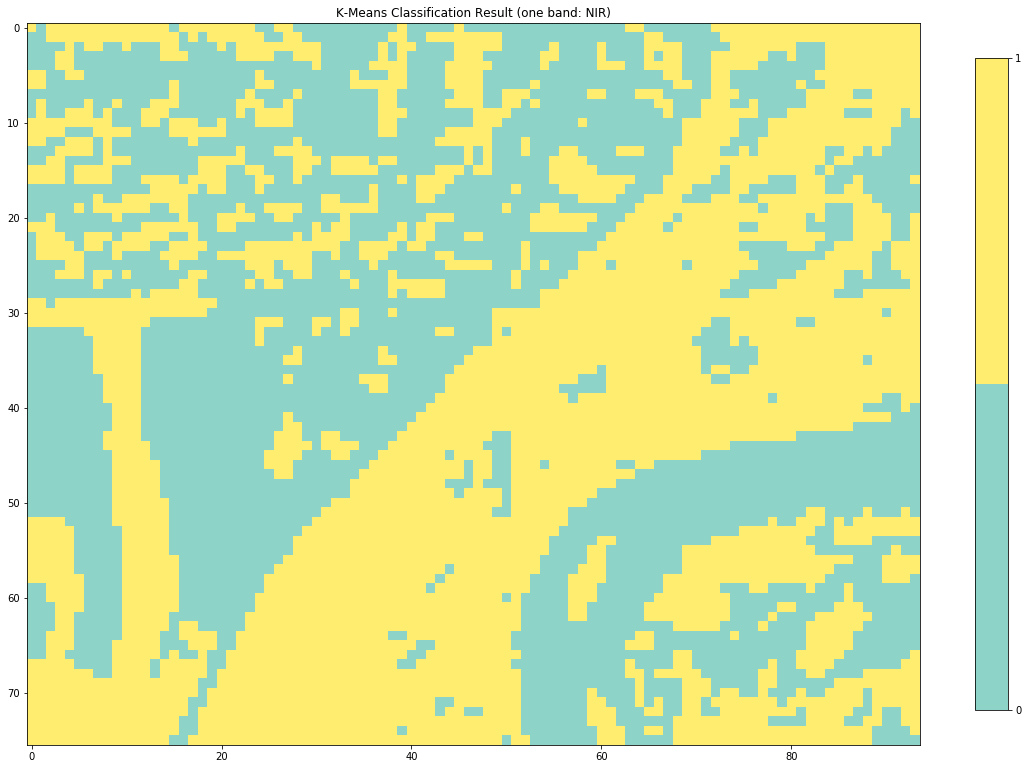

In [20]:
## SOLUTION
#Lets plot the Results
fig,ax = plt.subplots(figsize=(20,20))
ax.set_title("K-Means Classification Result (one band: NIR)")
plot=ax.imshow(X_NIR, cmap=plt.cm.get_cmap('Set3', 2))
#plot.clim(-0.5, 2.5)
plt.colorbar(plot, ticks=[0, 1, 2],shrink=0.6)
plt.show()

<p>12. Based on the previous plot with 2 clusters, can you properly classify the raster band? In other words, are all landclasses represented in the classification output?</p>

no, it is not possible to classify this raster with only 2 clusters, because the images has many more landclasses

<p>13. Based on the previous plot with 2 clusters, which is the minimum of clusters to choose in order to address all landclasses from your raster band?</p>

since the raster has at least the following classes: Water, Forest conifers, Forest deciduous, Grassland, Agriculture and Urban; the raster can be properly classified with at least 6 clusters

<h4>Perform unsupervised classification with k-means algorithm on the whole Rasterstack (4 bands)</h4>

<p>Now you will apply everything you learned about kmeans classification on a RasterStack. Previously you did this for only one band: the NIR band. The procedure is similar, instead of 1 band, you will use now 4.</p>

In [21]:
# First we have to write all 4 bands 
stack = s2_stack.read()
print('Rasterio read multiband image shape equals',stack.shape)
s2_stack.meta["dtype"]

# Be careful Numpy Array indexes start at zero!
stack= np.zeros([stack.shape[1],stack.shape[2],stack.shape[0]],s2_stack.meta["dtype"])
print("Our desired format is",stack.shape)

Rasterio read multiband image shape equals (4, 76, 94)
Our desired format is (76, 94, 4)


In [22]:
for b in range(stack.shape[2]):
    # Let's print the band indexes
    # Be careful Numpy Array indexes start at zero!
    print(b)
    stack[:, :, b] = s2_stack.read(b+1)

0
1
2
3


<p>14. What does (4, 76, 94) mean? Hint: see question 8</p>

number of bands, number of rows, number of columns

<p>To help you visualize all the bands that will be classified, you can use the  command <code>plt.imshow(stack[:,:,0], cmap='')</code></p>

<p>15. Adapt the following code to write the correct labels in the x,y axis and the title depending on the case.</p>

Text(0, 0.5, 'Row number')

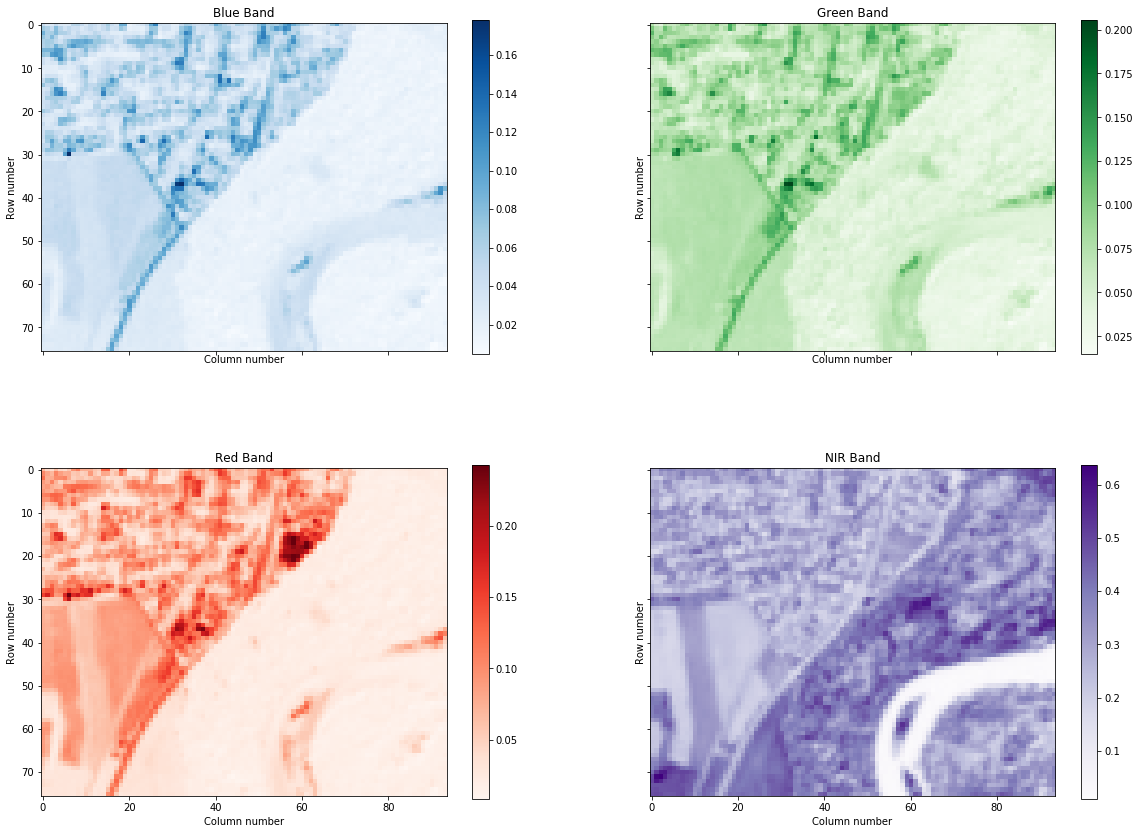

In [31]:
fig, axes = plt.subplots(2,2, figsize=(20,15), sharex=True, sharey=True)
# Be careful Numpy Array indexes start at zero!

plt.sca(axes[0,0]) # this command shows in which position the graph will the plotted. [0,0] = upper left corner
plt.imshow(stack[:,:,0], cmap='Blues')
plt.colorbar(shrink=0.9)
plt.title('Blue Band')
plt.xlabel('Column number')
plt.ylabel('Row number')

plt.sca(axes[0,1]) # this command shows in which position the graph will the plotted. [0,1] = upper right corner
plt.imshow(stack[:,:,1], cmap='Greens')
plt.colorbar(shrink=0.9)
plt.title('Green Band')
plt.xlabel('Column number')
plt.ylabel('Row number')

plt.sca(axes[1,0]) # this command shows in which position the graph will the plotted. [1,0] = bottom left corner
plt.imshow(stack[:,:,2], cmap='Reds')
plt.colorbar(shrink=0.9)
plt.title('Red Band')
plt.xlabel('Column number')
plt.ylabel('Row number')

#This command equals the one we used before to visualize band 4 using the show() function from rasterio
plt.sca(axes[1,1]) # this command shows in which position the graph will the plotted. [1,1] = bottom right corner
plt.imshow(stack[:,:,3], cmap='Purples')
plt.colorbar(shrink=0.9)
plt.title('NIR Band')
plt.xlabel('Column number')
plt.ylabel('Row number')

<p>Now starts the classification code.</p>

In [24]:
# Now lets reshape our stack into 4 linear vectors like the one we had before
# First we are going to calculate the dimnesions
new_shape = (stack.shape[0] * stack.shape[1], stack.shape[2])
print('The new dimensions are',new_shape)

The new dimensions are (7144, 4)


In [25]:
# Secondly we can use the calculated shape
X = stack[:, :, :4].reshape(new_shape)

In [26]:
#Now we can use k_means like we did before
k_means = cluster.KMeans(n_clusters=8)
k_means.fit(X)

X_cluster = k_means.labels_
# and reshape it
X_cluster = X_cluster.reshape(stack[:, :, 0].shape)

Text(0, 0.5, 'Row number')

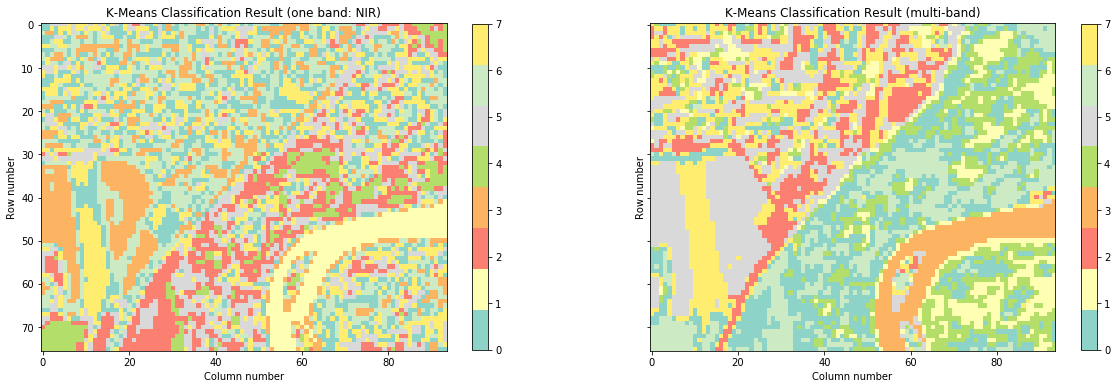

In [36]:
#Now lets plot our multiband classification together with the classfication if the NIR-Band
fig, axes = plt.subplots(1,2, figsize=(20, 20), sharex=True, sharey=True)

plt.sca(axes[0])
plt.imshow(X_NIR, cmap=plt.cm.get_cmap('Set3', 8))
plt.colorbar(ticks=[0, 1, 2, 3, 4, 5, 6, 7],shrink=0.3)
plt.title("K-Means Classification Result (one band: NIR)")
plt.xlabel('Column number')
plt.ylabel('Row number')

plt.sca(axes[1])
plt.imshow(X_cluster, cmap=plt.cm.get_cmap('Set3', 8))
plt.colorbar(ticks=[0, 1, 2, 3, 4, 5, 6, 7],shrink=0.3)
plt.title("K-Means Classification Result (multi-band)")
plt.xlabel('Column number')
plt.ylabel('Row number')


Export your results

In [39]:
from osgeo import gdal, gdal_array

# first, open one raster that has the characteristics you will want to use: CRS, extent, resolution, etc. 
# in this case, I opened the rasterstack I used for the unsupervised classification
ds = gdal.Open("C:/Users/ulloa-to/PythonProjects/practices_fe1_ss2020/scripts/data/p4/s2_Nodata_rasterstack/S2A_L2A_T32UPU_rstck_id1.tif")
# choose one band from the rasterstack
band = ds.GetRasterBand(1)
# define shape
arr = band.ReadAsArray()
[cols, rows] = arr.shape
# define format type
format = "GTiff"
driver = gdal.GetDriverByName(format)

# location and name of the output raster
outDataRaster = driver.Create("C:/Users/ulloa-to/PythonProjects/practices_fe1_ss2020/scripts/data/p4/unsup_kmeans/8kmeans_rasterstack.tif", rows, cols, 1, gdal.GDT_Byte)
# sets same geotransform as input
outDataRaster.SetGeoTransform(ds.GetGeoTransform())
# sets same projection as input
outDataRaster.SetProjection(ds.GetProjection())

# write the raster you want to export. In this case, I want to export "X_cluster", the classification of the rasterstack
# I use all the parameters from "ds" to define my new output raster, and then I fill in the new values (in this case, X_cluster values)
outDataRaster.GetRasterBand(1).WriteArray(X_cluster)

outDataRaster.FlushCache() ## remove from memory
del outDataRaster ## delete the data (not the actual geotiff)

<p>16. Repeat the unsupervised (kmeans) classification of the Rasterstack with the right number of clusters based on the landclasses that you recognize (hint: see questions 9, 11).</p>

NOTE: for more information about the color scales, visit: https://matplotlib.org/tutorials/colors/colormaps.html
            

<div style="text-align: right"> <small>This tutorial was prepared with the support from Gabriel Cevallos. May 2020</small> </div>